# Churn Prediction

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read dataset into a dataframe
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Exploratory Data Analysis

In [5]:
df.isna().sum().sum()

0

In [6]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [8]:
binary_cols # categorical features with two classes

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

<AxesSubplot: xlabel='PaperlessBilling', ylabel='count'>

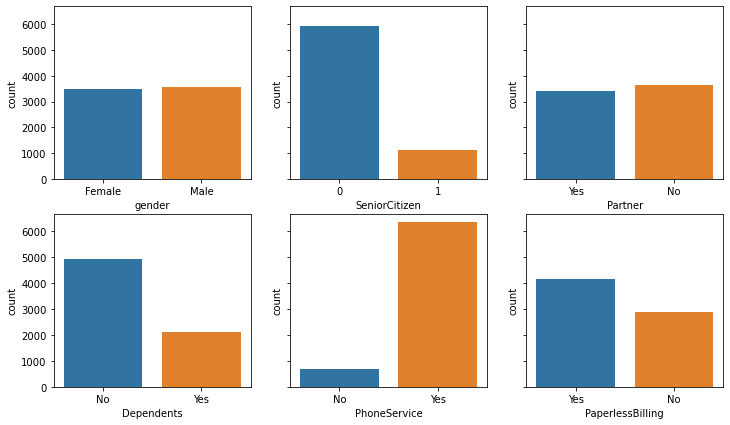

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot(x="gender", data=df, ax=axes[0,0])
sns.countplot(x="SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot(x="Partner", data=df, ax=axes[0,2])
sns.countplot(x="Dependents", data=df, ax=axes[1,0])
sns.countplot(x="PhoneService", data=df, ax=axes[1,1])
sns.countplot(x="PaperlessBilling", data=df, ax=axes[1,2])

In [10]:
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [11]:
# Average churn rates for each binary variable
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [12]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [13]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [14]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [15]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [16]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


<AxesSubplot: xlabel='TechSupport', ylabel='count'>

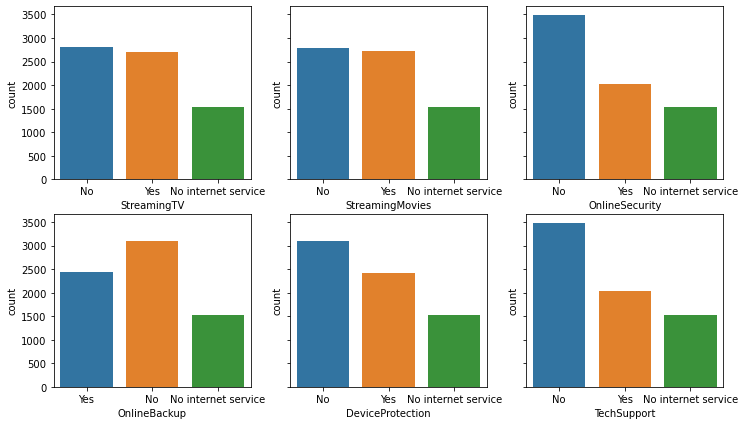

In [17]:
# Other categorical features
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot(x="StreamingTV", data=df, ax=axes[0,0])
sns.countplot(x="StreamingMovies", data=df, ax=axes[0,1])
sns.countplot(x="OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot(x="OnlineBackup", data=df, ax=axes[1,0])
sns.countplot(x="DeviceProtection", data=df, ax=axes[1,1])
sns.countplot(x="TechSupport", data=df, ax=axes[1,2])

In [18]:
df[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [19]:
df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


In [20]:
df[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [21]:
df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [22]:
df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [23]:
df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [24]:
df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [25]:
df[['TechSupport','Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [26]:
df[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


<AxesSubplot: xlabel='Contract', ylabel='count'>

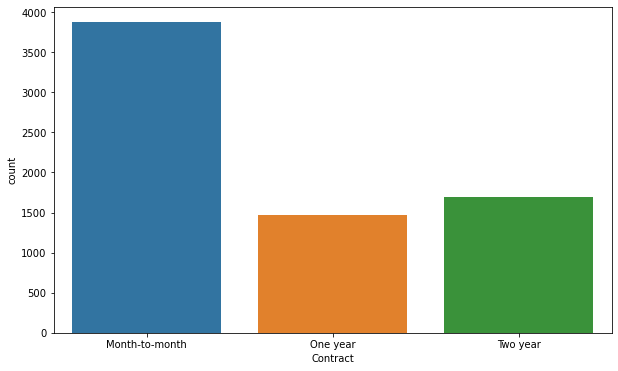

In [27]:
#contract, payment method.
plt.figure(figsize=(10,6))
sns.countplot(x="Contract", data=df)

In [28]:
df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


<AxesSubplot: xlabel='PaymentMethod', ylabel='count'>

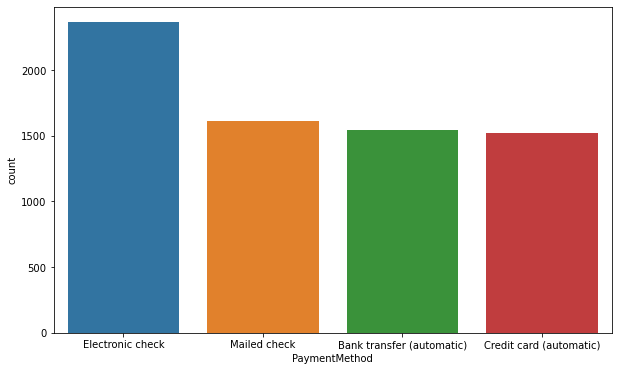

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x="PaymentMethod", data=df)

<AxesSubplot: xlabel='MonthlyCharges', ylabel='Count'>

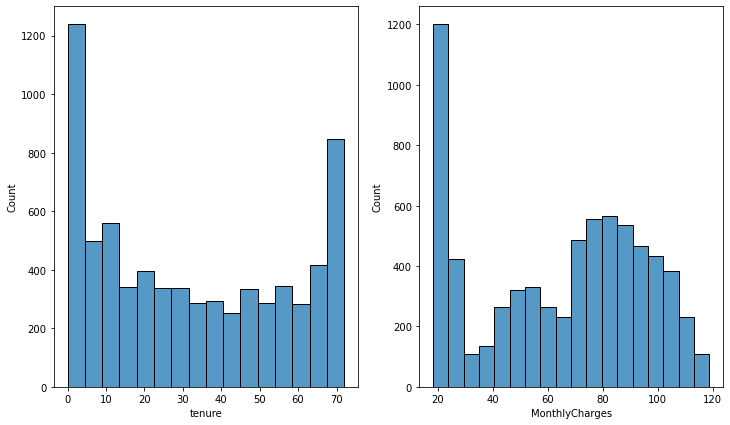

In [30]:
#The continuous features are tenure, monthly charges and total charges. 
#The amount in total charges columns is proportional to tenure (months) multiplied by monthly charges. 
#So it is unnecessary to include total charges in the model.
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.histplot(x=df["tenure"], ax=axes[0])
sns.histplot(x=df["MonthlyCharges"], ax=axes[1])

In [31]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [32]:
df[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


In [33]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

## 2. Data Preprocessing

In [34]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


In [35]:
df.shape

(7043, 16)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 
'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

clean_data = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [38]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
clean_data['tenure'] = a
clean_data['MonthlyCharges'] = b

In [39]:
clean_data.shape

(7043, 26)

In [40]:
from sklearn.model_selection import train_test_split
X = clean_data.drop(['Churn'], axis=1) #features (independent variables)
y = clean_data['Churn'] #target (dependent variable)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8713170039048633

In [46]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8034066713981547

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report( pred_test, y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1135
           1       0.50      0.68      0.57       274

    accuracy                           0.80      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.83      0.80      0.81      1409



In [49]:
print(confusion_matrix( pred_test, y_test))

[[947 188]
 [ 89 185]]


Text(0.5, 1.0, 'Class Distribution Before Resampling')

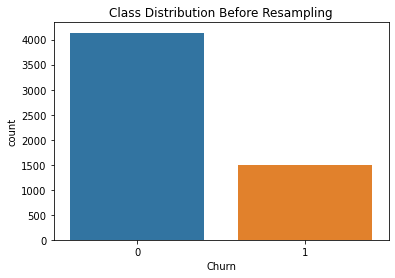

In [50]:
sns.countplot(x=y_train).set_title('Class Distribution Before Resampling')

### Resampling of training data

Text(0.5, 1.0, 'Class Distribution Before Resampling')

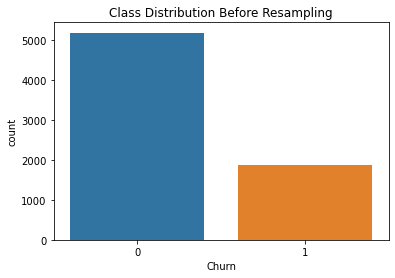

In [51]:
sns.countplot(x='Churn', data=df).set_title('Class Distribution Before Resampling')

In [52]:
X_no = pd.concat([X_train, y_train], axis=1)[y_train == 0]
X_yes = pd.concat([X_train, y_train], axis=1)[y_train == 1]

In [53]:
print(len(X_no),len(X_yes))

4138 1496


In [54]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)

Text(0.5, 1.0, 'Class Distribution After Resampling')

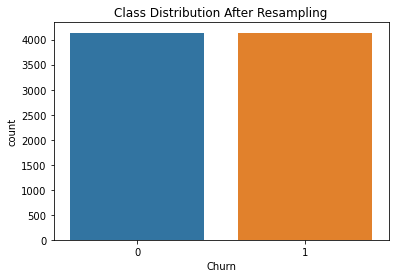

In [55]:
X_upsampled = pd.concat([X_no, X_yes_upsampled]).reset_index(drop=True)
sns.countplot(x='Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [57]:
from sklearn.model_selection import train_test_split
X_train = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y_train = X_upsampled['Churn'] #target (dependent variable)

## 3. Model Creation and Evaluation

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [59]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [60]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8946350894151764

In [61]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.7750177430801988

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(classification_report( pred_test, y_test))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       901
           1       0.76      0.56      0.64       508

    accuracy                           0.78      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.77      0.78      0.77      1409



In [64]:
print(confusion_matrix(pred_test, y_test))

[[810  91]
 [226 282]]


## 4. Improving the model

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5, scoring='f1_micro')

In [67]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]},
             scoring='f1_micro')

In [68]:
clf.best_params_

{'max_depth': 25, 'n_estimators': 150}

In [69]:
clf.best_score_

0.8972941751682063

In [70]:
pred_test_be = clf.best_estimator_.predict(X_test)

In [71]:
print(classification_report( pred_test_be, y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1078
           1       0.52      0.59      0.55       331

    accuracy                           0.78      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.79      0.78      0.78      1409



In [72]:
print(confusion_matrix( pred_test_be, y_test))

[[900 178]
 [136 195]]
